In [3]:
using JLD2, FileIO
using Plots

data_loc = "simulation_results.jld2"

"simulation_results.jld2"

In [4]:
N_vals = 10:10:80
σ_vals = [0.000, 0.001, 0.002]


3-element Vector{Float64}:
 0.0
 0.001
 0.002

┌ Warning: type NDTensors.Dense{Float64,Vector{Float64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588
┌ Warning: type NDTensors.Tensor{Float64,1,JLD2.ReconstructedMutable{Symbol("Dense{Float64,Vector{Float64}}"), (:data,), Tuple{Any}},Tuple{Int64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588


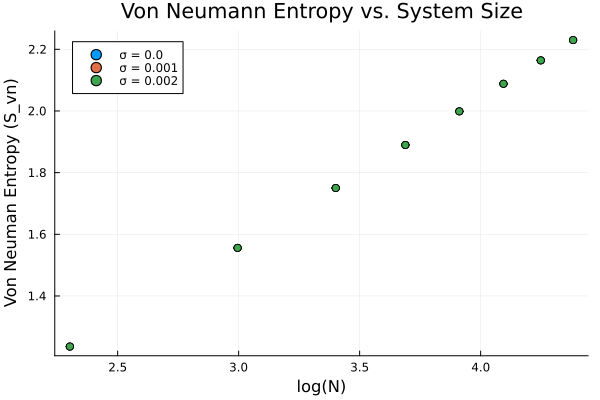

In [5]:
function plot_entropy_vs_logN(N_vals, σ_vals, data_loc)
    gr()
    entropy_plot = plot(
        title = "Von Neumann Entropy vs. System Size",
        xlabel = "log(N)",
        ylabel = "Von Neuman Entropy (S_vn)",
        legend = :topleft
    )

    # open the jld2 file
    jldopen(data_loc, "r") do file
       for σ in σ_vals
            #* collect data
            plot_log_N = Float64[]
            plot_S_vn = Float64[]
            plot_S_err = Float64[]
            
            for N in N_vals
                group_path = "N=$(N)/sigma=$(σ)"
                if haskey(file, group_path)
                    avg_ent = file[group_path]["avg_entropy"]
                    err_ent = file[group_path]["err_entropy"]
                    push!(plot_log_N, log(N))
                    push!(plot_S_vn, avg_ent)
                    push!(plot_S_err, err_ent)
                else
                    println("Warning: MISSING DATA for N=$N, σ=$σ !")
                end
            end

            if !isempty(plot_log_N)
                scatter!(
                    entropy_plot,
                    plot_log_N,
                    plot_S_vn,
                    yerror = plot_S_err,
                    label = "σ = $σ",
                    marker_size=4,
                    capstyle = :round
                )
            else
                println("No data found for σ=$σ.")
            end
        end
    end
    display(entropy_plot)
end

plot_entropy_vs_logN(N_vals, σ_vals, data_loc)

** Linear as expected. 

┌ Warning: type NDTensors.Dense{Float64,Vector{Float64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588
┌ Warning: type NDTensors.Tensor{Float64,1,JLD2.ReconstructedMutable{Symbol("Dense{Float64,Vector{Float64}}"), (:data,), Tuple{Any}},Tuple{Int64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588


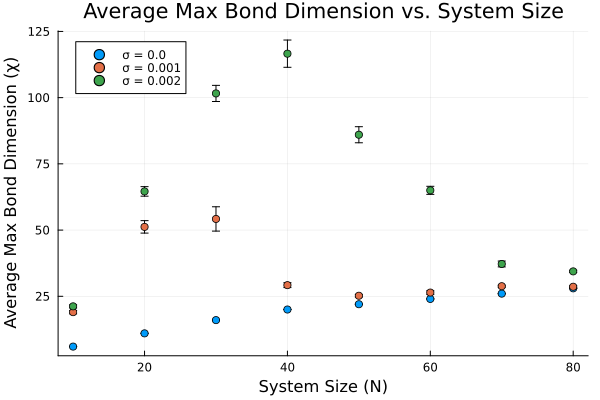

In [6]:
function plot_bond_dim_vs_N(N_vals, σ_vals, data_loc)
    
    gr() 
    bond_dim_plot = plot(
        title = "Average Max Bond Dimension vs. System Size",
        xlabel = "System Size (N)",
        ylabel = "Average Max Bond Dimension (χ)",
        legend = :topleft
    )
    
    if !isfile(data_loc)
        println("Error: Results file not found at '$data_loc'")
        println("Please run your 'get_data.jl' simulation script first.")
        return
    end
    

    jldopen(data_loc, "r") do file

        for σ in σ_vals
            plot_N = Float64[]
            plot_chi = Float64[]
            plot_chi_err = Float64[]
            
    
            for N in N_vals
                group_path = "N=$(N)/sigma=$(σ)"
                
        
                if haskey(file, group_path)
        
                    avg_chi = file[group_path]["avg_bond_dim"]
                    err_chi = file[group_path]["err_bond_dim"]
                    
          
                    push!(plot_N, N) 
                    push!(plot_chi, avg_chi)
                    push!(plot_chi_err, err_chi)
                else
                    println("Warning: Missing data for N=$N, σ=$σ. Skipping this point.")
                end
            end
            

            if !isempty(plot_N)
                scatter!(
                    bond_dim_plot,
                    plot_N, 
                    plot_chi,
                    yerror = plot_chi_err, 
                    label = "σ = $σ",
                    markersize = 4,
                    capstyle = :round 
                )
            else
                println("No data found for σ = $σ.")
            end
        end
    end
    
    display(bond_dim_plot)

    # savefig(bond_dim_plot, "bond_dim_vs_N.png")
    # println("Plot saved to bond_dim_vs_N.png")
end

# --- Run the function ---
plot_bond_dim_vs_N(N_vals, σ_vals, data_loc)

┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: type NDTensors.Dense{Float64,Vector{Float64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588
┌ Warning: type NDTensors.Tensor{Float64,1,JLD2.ReconstructedMutable{Symbol("Dense{Float64,Vector{Float64}}"), (:data,), Tuple{Any}},Tuple{Int64}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/WDhXU/src/data/reconstructing_datatypes.jl:588
┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8ZnR3/src/axes.jl:75
┌ Warning: Skipped yaxis arg scientific
└ @ Plots ~/.julia/packages/Plots/8

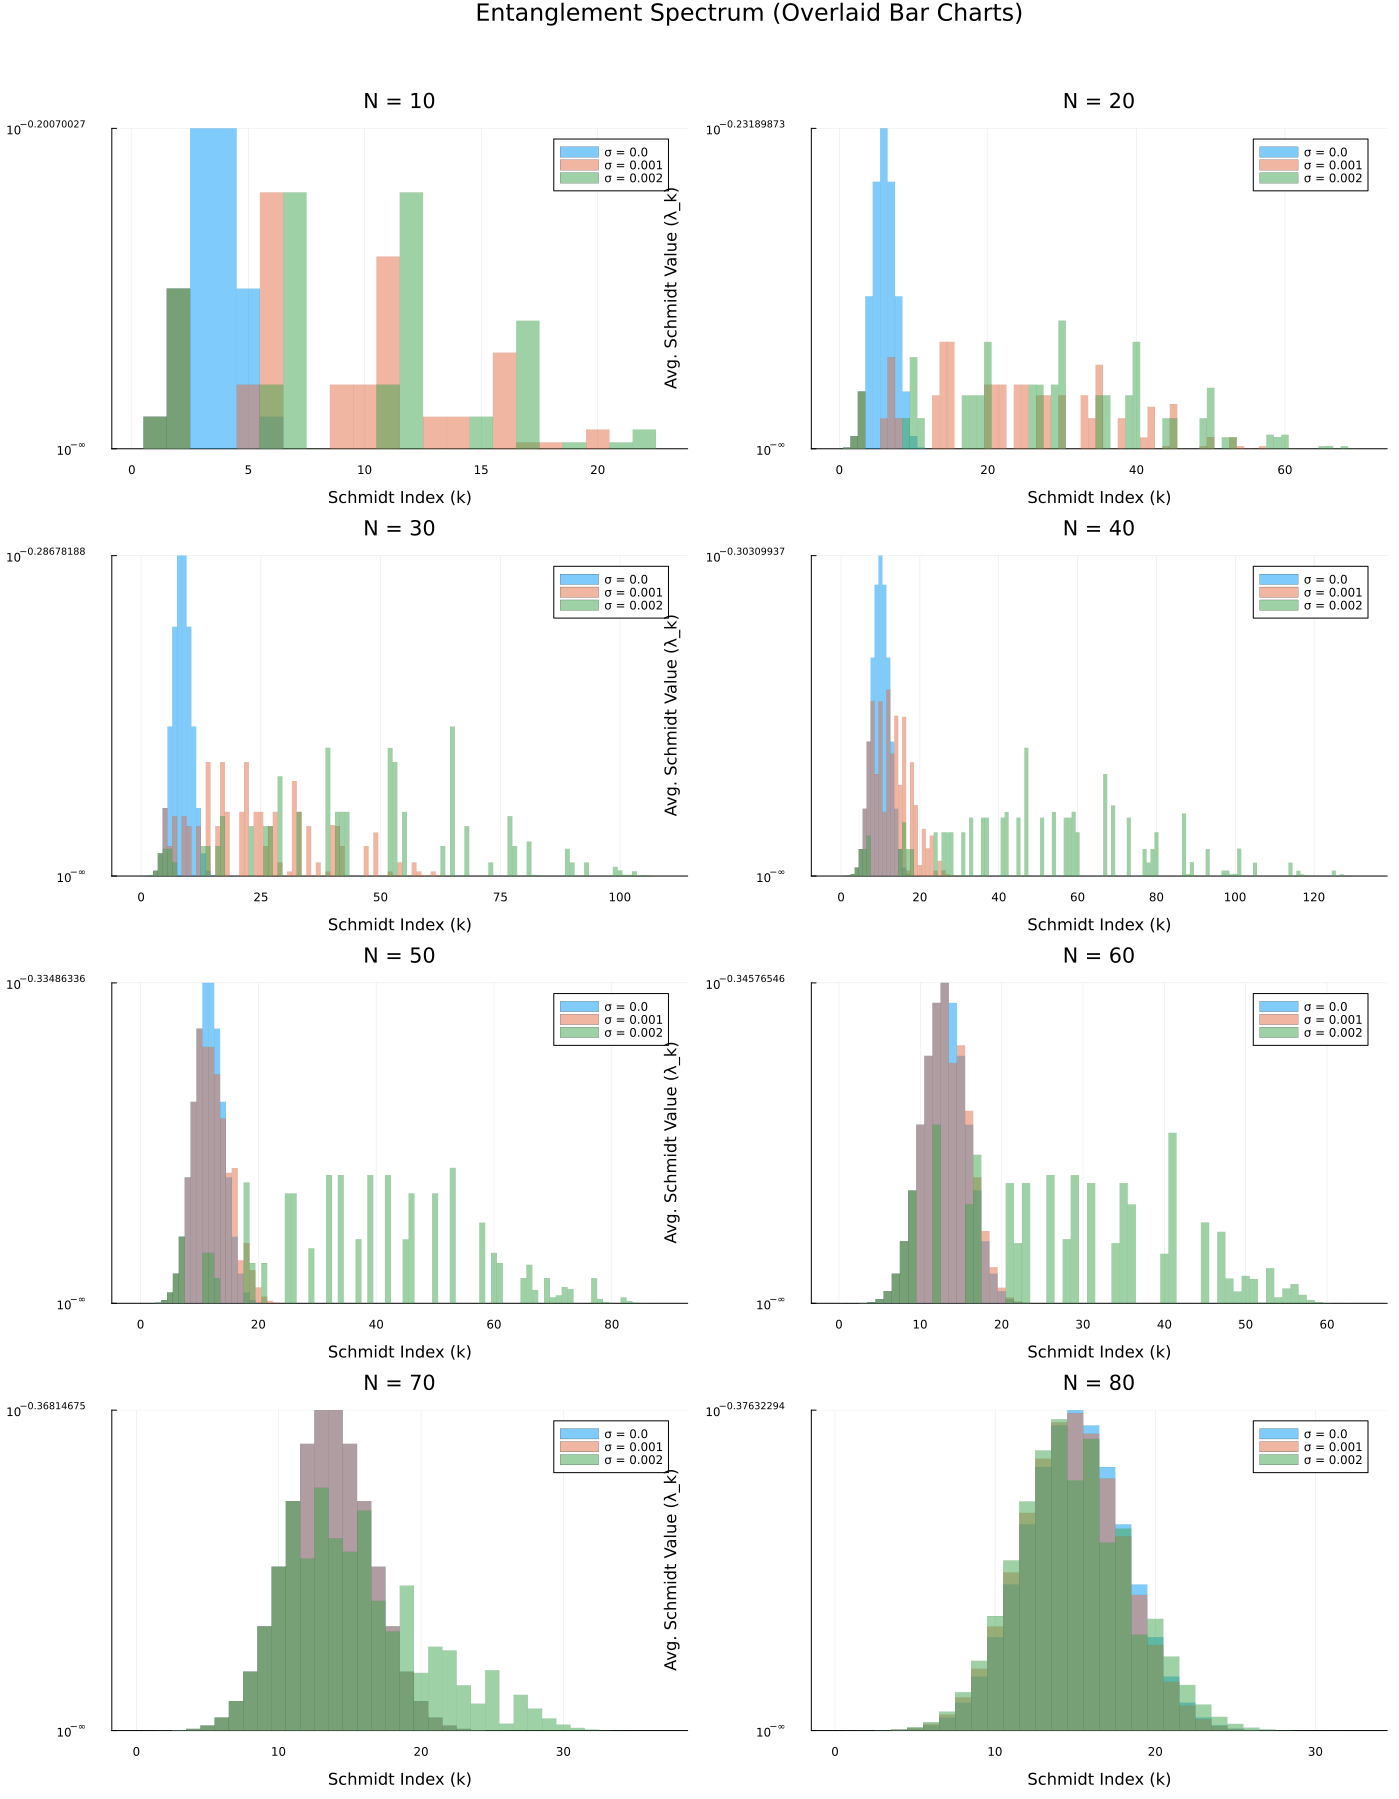

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict

Plot saved to entanglement_spectrum_bars_overlaid.png


┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict

In [7]:
function plot_entanglement_spectrum(N_vals, σ_vals, data_loc)
    
    # We need to open the JLD2 file
    if !isfile(data_loc)
        println("Error: Results file not found at '$data_loc'")
        println("Please run your 'get_data.jl' simulation script first.")
        return
    end

    # Use gr() backend for standard plots
    gr()

    # 1. Create a list to store all our individual plot objects
    plot_list = []

    # Open the file once for reading
    jldopen(data_loc, "r") do file
        
        # 2. Outer loop: Create one subplot for each N
        for N in N_vals
            
            # Create the individual subplot for this N
            # CRITICAL: yscale = :log10 is essential for this plot
            subplot = plot(
                title = "N = $N",
                xlabel = "Schmidt Index (k)",
                ylabel = "Avg. Schmidt Value (λ_k)",
                yscale = :log10,
                legend = :topright,
                yaxis = (formatter = :scientific)
            )

            # 3. Inner loop: Add one bar chart for each sigma
            for σ in σ_vals
                
                group_path = "N=$(N)/sigma=$(σ)"
                
                if haskey(file, group_path)
                    # Load the averaged data
                    avg_spec = file[group_path]["avg_schmidt_spectrum"]
                    
                    # Create the x-axis: 1, 2, 3, ...
                    k_vals = 1:length(avg_spec)
                    
                    # Add this sigma's data to the subplot as a BAR chart
                    bar!(
                        subplot,
                        k_vals, 
                        avg_spec,
                        label = "σ = $σ",
                        bar_width = 1.0,     # Make bars touch
                        alpha = 0.5,         # Make semi-transparent
                        linewidth = 0,       # No outlines
                    )
                else
                    println("Warning: Missing data for N=$N, σ=$σ. Skipping this.")
                end
            end # end sigma loop

            # 4. Add the completed subplot to our list
            push!(plot_list, subplot)
            
        end # end N loop
    end # end jldopen

    # 5. Assemble the final grid plot
    # We have 8 plots, so let's arrange them in a 4x2 grid
    final_grid_plot = plot(
        plot_list...,          # Splat the list of plots
        layout = (4, 2),      # 4 rows, 2 columns
        size = (1400, 1800),  # (width, height) - make it large!
        plot_title = "Entanglement Spectrum (Overlaid Bar Charts)"
    )

    # Display the final plot
    display(final_grid_plot)
    
    # --- How to Save ---
    savefig(final_grid_plot, "entanglement_spectrum_bars_overlaid.png")
    println("Plot saved to entanglement_spectrum_bars_overlaid.png")
end

# --- Run the function ---
plot_entanglement_spectrum(N_vals, σ_vals, data_loc)